In [ ]:
# Import laibraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# Load the dataset
df = pd.read_csv("/content/SaYoPillow.csv")
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
df.describe()
df.shape

(630, 9)

In [ ]:
# Put names for the columns
df.columns = ['snoring_rate', 'respiration_rate', 'body_temperature',
'limb_movement', 'blood_oxygen','eye_movement', 'sleeping_hours', 'heart_rate',
 'stress_level']

# Count the null values for each column
df.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

In [ ]:
df['stress_level'].value_counts()

stress_level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

In [ ]:
# Check the correlation between the features and the target value
corr = df.corr()
corr['stress_level']

snoring_rate        0.975322
respiration_rate    0.963516
body_temperature   -0.962354
limb_movement       0.971071
blood_oxygen       -0.961092
eye_movement        0.951988
sleeping_hours     -0.973036
heart_rate          0.963516
stress_level        1.000000
Name: stress_level, dtype: float64

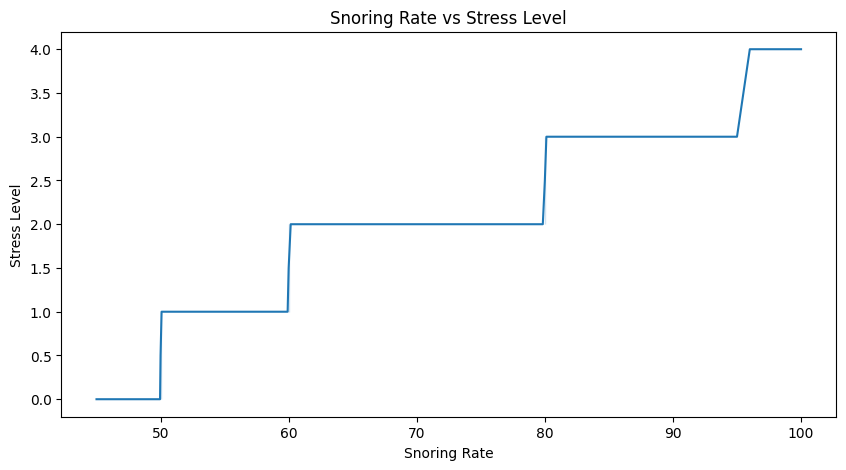

In [ ]:
# Exploring Data in visual graphs
plt.figure(figsize=(10,5))
sns.lineplot(x='snoring_rate',y='stress_level',data=df)
plt.xlabel("Snoring Rate")
plt.ylabel('Stress Level')
plt.title('Snoring Rate vs Stress Level')
plt.xticks(rotation=0)
plt.show()

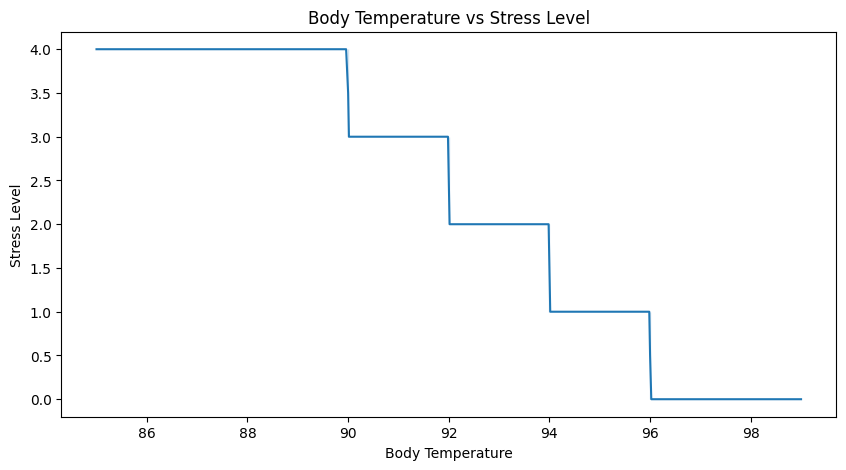

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='body_temperature',y='stress_level',data=df)
plt.xlabel("Body Temperature")
plt.ylabel('Stress Level')
plt.title('Body Temperature vs Stress Level')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Split the dataset into x (features) and y (target value)
x = df.copy();
x.drop('stress_level', axis = 1, inplace = True)
y = df['stress_level']

In [ ]:
# Normalize data features using minmax

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(x)

# Split the data into taining set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)

data_preprocessed = pd.DataFrame(X, columns = ['snoring_rate', 'respiration_rate', 'temperature',
                                               'limb_move', 'blood_oxygen', 'eye_move', 'sleep_hour',
                                               'heart_rate'])
data_preprocessed['stress_level'] = y
data_preprocessed.head()

,snoring_rate,respiration_rate,temperature,limb_move,blood_oxygen,eye_move,sleep_hour,heart_rate,stress_level
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0


In [ ]:
# 1-Train the models

# Initialize all the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "Stochastic Gradient Descent Classifier": SGDClassifier(random_state=42)
}

# Training
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train each model
    trained_models[name] = model  # Store the trained model

In [ ]:
# 2-Vaidate the models on the training set using cross-validation

def validate_models_with_cv(models, X, y, cv=5):

    model_cv_results = []  # List to store results for DataFrame

    for name, model in models.items():

        # Calculate cross-validation scores
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

        # Store results in the list
        model_cv_results.append({
            "Model": name,
            "CV Mean Accuracy": cv_scores.mean()
        })

    # Create DataFrame from results
    results_df = pd.DataFrame(model_cv_results)

    # Sort DataFrame by mean cross-validation accuracy in descending order
    return results_df.sort_values(by="CV Mean Accuracy", ascending=False).reset_index(drop=True)


# Validate all models using cross-validation and display the DataFrame
sorted_cv_accuracies = validate_models_with_cv(trained_models, X, y)
sorted_cv_accuracies

,Model,CV Mean Accuracy
0,Logistic Regression,1.000000
1,Random Forest Classifier,0.988059
2,Gradient Boosting Classifier,0.986079
3,Stochastic Gradient Descent Classifier,0.887050


Model: Logistic Regression
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



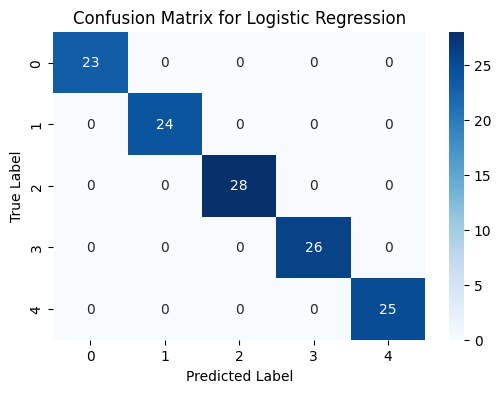

Model: Random Forest Classifier
Accuracy: 0.9841
F1 Score: 0.9841
Precision: 0.9847
Recall: 0.9841

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.96      0.98        24
           2       0.97      1.00      0.98        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.99      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



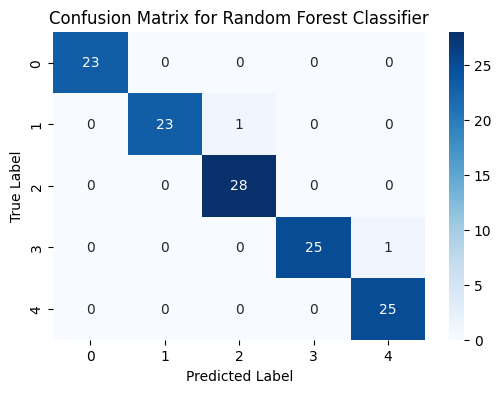

Model: Gradient Boosting Classifier
Accuracy: 0.9762
F1 Score: 0.9761
Precision: 0.9776
Recall: 0.9762

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.92      0.96        24
           2       0.93      1.00      0.97        28
           3       1.00      0.96      0.98        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



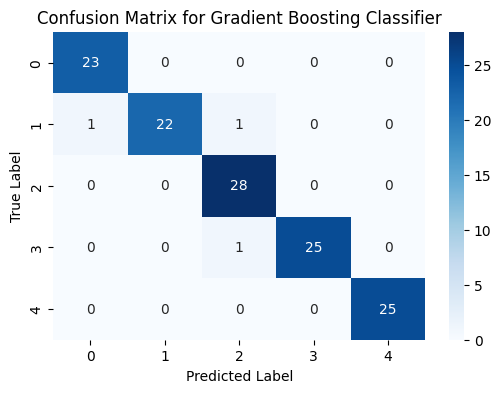

Model: Stochastic Gradient Descent Classifier
Accuracy: 0.9524
F1 Score: 0.9516
Precision: 0.9608
Recall: 0.9524

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       0.82      1.00      0.90        28
           3       1.00      0.77      0.87        26
           4       1.00      1.00      1.00        25

    accuracy                           0.95       126
   macro avg       0.96      0.95      0.95       126
weighted avg       0.96      0.95      0.95       126



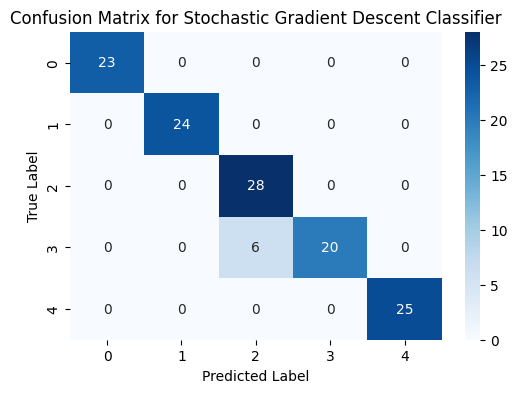

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000
1,Random Forest Classifier,0.984127,0.984112,0.984706,0.984127
2,Gradient Boosting Classifier,0.976190,0.976126,0.977579,0.976190
3,Stochastic Gradient Descent Classifier,0.952381,0.951580,0.960784,0.952381


In [ ]:
# 3-Evaluate the models on the test set

def evaluate_models(models, X_test, y_test):

    model_results = []  # List to store results for DataFrame

    for name, model in models.items():

        # Predict on testing set
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        # Store results in the list
        model_results.append({
            "Model": name,
            "Accuracy": accuracy,
            "F1 Score": f1,
            "Precision": precision,
            "Recall": recall
        })

        # Print the evaluation metrics
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print("\nClassification Report:\n", classification_report(y_test, y_pred))

        # Plotting confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
        plt.title(f"Confusion Matrix for {name}")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    # Create DataFrame from results
    results_df = pd.DataFrame(model_results)

    # Sort DataFrame by accuracy in descending order
    return results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)


# Evaluate all models and display the DataFrame
sorted_accuracies = evaluate_models(trained_models, X_test, y_test)
sorted_accuracies

. snoring rate +
*   55%-80% adult men
*   40-50% adult women
*   20%-22% child

. Respiration rate +
*   12-20 breaths per min
*   15-25 breaths per min

. Body temperature -
*   97.9°F to 100.4°F for child
*   97.5°F to 98.2°F for adult

. Limb movement +
*   4-19 cm

. Blood oxygen levels -
*   95-100% for child, adult

. Eye movement +
*   50-60% for child,adult

. Number of hours slept -
*   9-11 hours child sleep per day
*   8-9 hours adults sleep per day

. Heart rate +
*   60-95 bpm for child
*   60-100 bpm for adult






Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high)

In [ ]:
# Eample for predicating medium high stress

# Train
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Create a new DataFrame for the prediction
new_data1 = pd.DataFrame({
    'snoring_rate': [60],
    'respiration_rate': [25],
    'body_temperature': [95],
    'limb_movement': [15],
    'blood_oxygen': [92],
    'eye_movement': [95],
    'sleeping_hours': [5],
    'heart_rate': [74]
})

# Predict using the Logistic Regression model
predicted_stress_level1 = log_reg.predict(new_data1)

# Print the predicted stress level
print("Predicted stress level using Logistic Regression: ",predicted_stress_level1)

Predicted stress level using Logistic Regression:  [3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Eample for predicating low stress or normal

# Create a new DataFrame for the prediction
new_data2 = pd.DataFrame({
    'snoring_rate': [20],
    'respiration_rate': [16],
    'body_temperature': [98],
    'limb_movement': [8],
    'blood_oxygen': [100],
    'eye_movement': [60],
    'sleeping_hours': [12],
    'heart_rate': [60]
})

# Predict using the Logistic Regression model
predicted_stress_level2 = log_reg.predict(new_data2)

# Print the predicted stress level
print("Predicted stress level using Logistic Regression: ",predicted_stress_level2)

Predicted stress level using Logistic Regression:  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
